<a href="https://colab.research.google.com/github/brit228/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [0]:
!apt-get update && apt-get install ffmpeg

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import math

df_l = list(df.groupby("time"))

In [1]:
!apt-get update && apt-get install ffmpeg

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [567 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [730 kB]
Fetched 1,544 kB in 2s (690 kB/s)
Reading package lists... Done
Reading package li

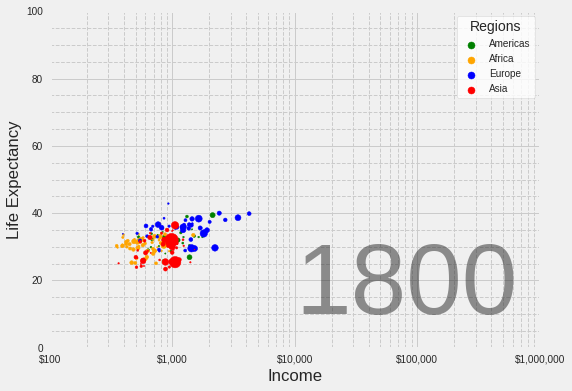

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import math

reg_col = {
    'americas': 'green',
    'africa': 'orange',
    'europe': 'blue',
    'asia': 'red'
}

df1 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv")

df = df1.join(df2.set_index(['geo','time']), on=['geo','time'], how="inner").join(df3.set_index("country")[["world_4region", "iso3166_1_alpha3", "gapminder_list"]], on="geo", how="inner").join(df4.set_index(['geo','time']), on=['geo','time'], how='inner')
df_l = list(df.groupby("time"))

plt.style.use('fivethirtyeight')
fig = plt.figure()
ax = fig.add_subplot(111)

year = ax.text(10000, 10, "1800", fontsize=100, alpha=0.5)
ax.set_xscale('log')
ax.set_xlim(100.0, 1000000.0)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.set_ylim(0.0, 100.0)
ax.set_xlabel("Income")
ax.set_ylabel("Life Expectancy")
ax.yaxis.set_minor_locator(mtick.MultipleLocator(5))
ax.grid(b=True, which='minor', linestyle='--', axis='both')

plt.subplots_adjust(left=0.1, right=0.95,  bottom=0.1, top=0.95)

l = []
for r in ['americas', 'africa', 'europe', 'asia']:
  d_y = df_l[0][1]
  l.append(ax.scatter(d_y[d_y['world_4region'] == r]["income_per_person_gdppercapita_ppp_inflation_adjusted"], d_y[d_y['world_4region'] == r]["life_expectancy_years"], c=reg_col[r], label=r.capitalize()))
  
ax.legend(l, ['Americas', 'Africa', 'Europe', 'Asia'], title="Regions", frameon=True, facecolor='white')

def update_img(n):
    year.set_text(str(n[0]))
    d_y = n[1]
    i = 0
    for r in ['americas', 'africa', 'europe', 'asia']:
      values = d_y[d_y['world_4region'] == r][["income_per_person_gdppercapita_ppp_inflation_adjusted", "life_expectancy_years"]]
      popu = d_y[d_y['world_4region'] == r]["population_total"]
      popu = popu.apply(lambda x: math.sqrt(x) / 100.0)
      l[i].set_offsets(values)
      l[i].set_sizes(popu)
      i += 1
    return (ax, )
    
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
ani = animation.FuncAnimation(fig, update_img, frames=df_l)
HTML(ani.to_html5_video())

In [5]:
import IPython
from plotly.offline import init_notebook_mode
display(IPython.core.display.HTML('''
      <script src="/static/components/requirejs/require.js"></script>
'''))
init_notebook_mode(connected=False)

import plotly.plotly as py
from plotly.offline import iplot

t_vals = [100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
rgb = [[0, 0, 255], [255, 0, 0]]

def lerp(n, a):
  vals = []
  n1 = n[0]
  n2 = n[1]
  for i in range(len(n1)):
    vals.append(int(n1[i] + (n2[i] - n1[i]) * a))
  return vals

data = [{
    "type": 'choropleth',
    "locations": list(df_l[0][1]["iso3166_1_alpha3"].apply(lambda x: x.upper()).values[:2]),
    "z": [2.0, 6.0],
    "text": list(df_l[0][1]["gapminder_list"].values[:2]),
    "colorscale": [[t_vals[0]/t_vals[len(t_vals) - t - 1], "rgb({n[0]},{n[1]},{n[2]})".format(n=lerp(rgb, t / (len(t_vals)-1)))] for t in range(len(t_vals))],
    "autocolorscale": False,
    "reversescale": False,
    "marker": {
        "line": {
            "color": 'rgb(180,180,180)',
            "width": 0.5
        }},
    "colorbar": {
        "tickprefix": '$',
        "title": 'Adjusted Income per Capita',
        'tick0': 0,
        'tickmode': 'array',
        'tickvals': [math.log10(t) for t in t_vals],
        'ticktext': ["${}".format(t) for t in t_vals]
    }
}]

frames = []
for n in df_l:
  frames.append({"name": str(n[0]),
                 "data": [{
        "type": 'choropleth',
        "locations": list(n[1]["iso3166_1_alpha3"].apply(lambda x: x.upper()).values),
        "z": list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].apply(lambda x: math.log10(x)).values),
        "text": ["{}: ${:,}".format(list(n[1]["gapminder_list"].values)[i], list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values)[i]) for i in range(len(list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values)))],
        "colorscale": [[t_vals[0]/t_vals[len(t_vals) - t - 1], "rgb({n[0]},{n[1]},{n[2]})".format(n=lerp(rgb, t / (len(t_vals)-1)))] for t in range(len(t_vals))],
        "hoverinfo": "location+text",
        "autocolorscale": False,
        "reversescale": False,
        "marker": {
            "line": {
                "color": 'rgb(180,180,180)',
                "width": 0.5
            }},
        "colorbar": {
            "tickprefix": '$',
            "title": 'Adjusted Income per Capita',
            'tick0': 0,
            'tickmode': 'array',
            'tickvals': [math.log10(t) for t in t_vals],
            'ticktext': ["${}".format(t) for t in t_vals]            
        }}]})

layout = {
    "title": 'Income per Capita from 1800 to 2017',
    "geo": {
        "showframe": False,
        "showcoastlines": True,
        "projection": {
            "type": 'Mercator'
        }
    },
    "sliders": [{
      'active': 0,
      'yanchor': 'top',
      'xanchor': 'left',
      'currentvalue': {
          'font': {'size': 20},
          'prefix': 'Year:\t',
          'visible': True,
          'xanchor': 'right'
      },
      'transition': {'duration': 0, 'mode': 'immediate'},
      'pad': {'b': 10, 't': 50},
      'len': 0.9,
      'x': 0.1,
      'y': 0,
      'steps': [{'args': [
        [n[0]],
        {'frame': {'duration': 0, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 0}}
     ],
     'label': str(n[0]),
     'method': 'animate'} for n in df_l]
    }]
}

fig = {"data": data, "frames": frames, "layout": layout}
iplot(fig, show_link=False)

In [0]:
t_vals = [100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
rgb = [[0, 0, 255], [255, 0, 0]]

def lerp(n, a):
  vals = []
  n1 = n[0]
  n2 = n[1]
  for i in range(len(n1)):
    vals.append(int(n1[i] + (n2[i] - n1[i]) * a))
  return vals

data = [{
    "type": 'choropleth',
    "locations": list(df_l[0][1]["iso3166_1_alpha3"].apply(lambda x: x.upper()).values[:2]),
    "z": [2.0, 6.0],
    "text": list(df_l[0][1]["gapminder_list"].values[:2]),
    "colorscale": [[t_vals[0]/t_vals[len(t_vals) - t - 1], "rgb({n[0]},{n[1]},{n[2]})".format(n=lerp(rgb, t / (len(t_vals)-1)))] for t in range(len(t_vals))],
    "autocolorscale": False,
    "reversescale": False,
    "marker": {
        "line": {
            "color": 'rgb(180,180,180)',
            "width": 0.5
        }},
    "colorbar": {
        "tickprefix": '$',
        "title": 'Adjusted Income per Capita',
        'tick0': 0,
        'tickmode': 'array',
        'tickvals': [math.log10(t) for t in t_vals],
        'ticktext': ["${}".format(t) for t in t_vals]
    }
}]

frames = []
for n in df_l:
  frames.append({"name": str(n[0]),
                 "data": [{
        "type": 'choropleth',
        "locations": list(n[1]["iso3166_1_alpha3"].apply(lambda x: x.upper()).values),
        "z": list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].apply(lambda x: math.log10(x)).values),
        "text": ["{}: ${:,}".format(list(n[1]["gapminder_list"].values)[i], list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values)[i]) for i in range(len(list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values)))],
        "colorscale": [[t_vals[0]/t_vals[len(t_vals) - t - 1], "rgb({n[0]},{n[1]},{n[2]})".format(n=lerp(rgb, t / (len(t_vals)-1)))] for t in range(len(t_vals))],
        "hoverinfo": "location+text",
        "autocolorscale": False,
        "reversescale": False,
        "marker": {
            "line": {
                "color": 'rgb(180,180,180)',
                "width": 0.5
            }},
        "colorbar": {
            "tickprefix": '$',
            "title": 'Adjusted Income per Capita',
            'tick0': 0,
            'tickmode': 'array',
            'tickvals': [math.log10(t) for t in t_vals],
            'ticktext': ["${}".format(t) for t in t_vals]            
        }}]})

layout = {
    "title": 'Income per Capita from 1800 to 2017',
    "geo": {
        "showframe": False,
        "showcoastlines": True,
        "projection": {
            "type": 'Mercator'
        }
    },
    "sliders": [{
      'active': 0,
      'yanchor': 'top',
      'xanchor': 'left',
      'currentvalue': {
          'font': {'size': 20},
          'prefix': 'Year:\t',
          'visible': True,
          'xanchor': 'right'
      },
      'transition': {'duration': 0, 'mode': 'immediate'},
      'pad': {'b': 10, 't': 50},
      'len': 0.9,
      'x': 0.1,
      'y': 0,
      'steps': [{'args': [
        [n[0]],
        {'frame': {'duration': 0, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 0}}
     ],
     'label': str(n[0]),
     'method': 'animate'} for n in df_l]
    }]
}

fig = {"data": data, "frames": frames, "layout": layout}
iplot(fig, show_link=False)

In [1]:
!apt-get update
!apt-get install libproj-dev
!apt-get install ffmpeg
!apt-get install libgeos-dev
!GEOS_DIR=/usr/bin
!pip install cython
!pip install cartopy
!pip install shapely

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 247 kB in 1s (174 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove

In [0]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib import animation, rc
from IPython.display import HTML
import math

reg_col = {
    'americas': [0.0, 1.0, 0.0],
    'africa': [1.0, 1.0, 0.0],
    'europe': [0.0, 0.0, 1.0],
    'asia': [1.0, 0.0, 0.0]
}

df1 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv")

df = df1.join(df2.set_index(['geo','time']), on=['geo','time'], how="inner").join(df3.set_index("country")[["world_4region", "iso3166_1_alpha3", "gapminder_list"]], on="geo", how="inner").join(df4.set_index(['geo','time']), on=['geo','time'], how='inner')
df_l = list(df.groupby("time"))

fig = plt.figure(figsize=(18,9))
ax0 = plt.subplot(1, 2, 2)
ax1 = plt.subplot(3, 2, 1, projection=ccrs.PlateCarree())
ax2 = plt.subplot(3, 2, 3, projection=ccrs.PlateCarree())
ax3 = plt.subplot(3, 2, 5, projection=ccrs.PlateCarree())

ax0.set_xscale('log')
ax0.set_xlim(100.0, 1000000.0)
ax0.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax0.set_ylim(0.0, 100.0)
ax0.set_xlabel("Income", fontsize=20)
ax0.set_ylabel("Life Expectancy", fontsize=20)
ax0.yaxis.set_minor_locator(mtick.MultipleLocator(5))
ax0.grid(b=True, which='minor', linestyle='--', axis='both')
year0 = ax0.text(30000, 5, "YEAR", fontsize=60, alpha=0.5)

ax1.set_title("Adjusted Income\nper Capita", fontsize=20, fontweight="bold")
ax2.set_title("Average Life Expectancy", fontsize=20, fontweight="bold")
ax3.set_title("Population", fontsize=20, fontweight="bold")

l = []
for r in ['americas', 'africa', 'europe', 'asia']:
  d_y = df_l[0][1]
  l.append(ax0.scatter(d_y[d_y['world_4region'] == r]["income_per_person_gdppercapita_ppp_inflation_adjusted"], d_y[d_y['world_4region'] == r]["life_expectancy_years"], c=reg_col[r], label=r.capitalize()))
  
ax0.legend(l, ['Americas', 'Africa', 'Europe', 'Asia'], title="Regions", frameon=True, facecolor='white')


shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
read = shpreader.Reader(shpfilename)

def update_img(n):
  d_y = n[1]
  year0.set_text(str(n[0]))
  i = 0
  for r in ['americas', 'africa', 'europe', 'asia']:
    values = d_y[d_y['world_4region'] == r][["income_per_person_gdppercapita_ppp_inflation_adjusted", "life_expectancy_years"]]
    popu = d_y[d_y['world_4region'] == r]["population_total"]
    popu = popu.apply(lambda x: math.sqrt(x) / 100.0)
    l[i].set_offsets(values)
    l[i].set_sizes(popu)
    i += 1
  for rec in read.records():
    if d_y[d_y['iso3166_1_alpha3'] == rec.attributes["ISO_A3"]]["income_per_person_gdppercapita_ppp_inflation_adjusted"].count() > 0:
      value = (math.log10(d_y[d_y['iso3166_1_alpha3'] == rec.attributes["ISO_A3"]]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values[0]) - 2.0) / 4.0
      c = [i * value for i in reg_col[d_y[d_y['iso3166_1_alpha3'] == rec.attributes["ISO_A3"]]["world_4region"].values[0]]]
      shape_feature = ShapelyFeature(rec.geometry, ccrs.PlateCarree(), facecolor=np.array(c))
      ax1.add_feature(shape_feature)
      value = d_y[d_y['iso3166_1_alpha3'] == rec.attributes["ISO_A3"]]["life_expectancy_years"].values[0] / 100.0
      c = [i * value for i in reg_col[d_y[d_y['iso3166_1_alpha3'] == rec.attributes["ISO_A3"]]["world_4region"].values[0]]]
      shape_feature = ShapelyFeature(rec.geometry, ccrs.PlateCarree(), facecolor=np.array(c))
      ax2.add_feature(shape_feature)
      value = math.log10(d_y[d_y['iso3166_1_alpha3'] == rec.attributes["ISO_A3"]]["population_total"].values[0]) / 10.0
      c = [i * value for i in reg_col[d_y[d_y['iso3166_1_alpha3'] == rec.attributes["ISO_A3"]]["world_4region"].values[0]]]
      shape_feature = ShapelyFeature(rec.geometry, ccrs.PlateCarree(), facecolor=np.array(c))
      ax3.add_feature(shape_feature)
    elif rec.attributes["ISO_A3"] != "ATA":
      shape_feature = ShapelyFeature(rec.geometry, ccrs.PlateCarree(), facecolor=np.array([0.2, 0.2, 0.2]))
      ax1.add_feature(shape_feature)
      ax2.add_feature(shape_feature)
      ax3.add_feature(shape_feature)
  return (ax0, ax1, ax2, ax3, )

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
ani = animation.FuncAnimation(fig, update_img, frames=df_l)
HTML(ani.to_html5_video())